In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from scipy.stats import kstest, mannwhitneyu
import itertools
# import shap

from tqdm import tqdm

import matplotlib.pyplot as plt
import pingouin as pg
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

met_file_path = "C:/Users/shrra/Downloads/merged_n586_Alasdair_May21_concatenated_renamed.csv"
met1_df = pd.read_csv(met_file_path)
print(met1_df.columns)


Index(['mz_time', 'C-1ZSH0', 'C-1ZUY0', 'C-1ZV09', 'C-1ZV17', 'C-1ZY97',
       'C-1ZY89', 'C-1ZXQ5', 'C-1ZRJ6', 'C-1ZV25',
       ...
       '6204', '6888', '6957', '7010', '7021', '7106', '7519', '8938', '8950',
       '9764'],
      dtype='object', length=587)


In [3]:
met1_df_T  = met1_df.T

In [4]:


met1_df_T.reset_index(inplace=True)

# Set the first row as the header
met1_df_T.columns = met1_df_T.iloc[0]
met1_df_T = met1_df_T[1:]

# Reset the index again (if you want to have a clean numeric index)
met1_df_T.reset_index(drop=True, inplace=True)

# Rename the newly created index column (if needed)
met1_df_T.rename(columns={met1_df_T.columns[0]: 'ID'}, inplace=True)

# # Dictionary to map old column names to new column names
# new_column_names = {
#     'mz_time': 'ID'
# }

# # Renaming columns
# met1_df_T = met1_df_T.rename(columns=new_column_names)
print(met1_df_T.columns)


Index(['ID', '85.9631_153.8', '86.0601_71.8', '86.0965_42.45', '86.9087_49.05',
       '87.05525_82.6', '87.08045_28.6', '87.0935_42.95', '87.09985_44',
       '88.0394_80',
       ...
       '1144.21635_54', '1145.28445_65.4', '1145.78475_65.45',
       '1153.83065_66.15', '1168.74555_64.8', '1178.78305_64.8',
       '1179.2791_65.5', '1179.77765_65.45', '1212.76635_65.5',
       '1247.76475_65.65'],
      dtype='object', name=0, length=3759)


In [5]:
met1_df_T['ID'] = met1_df_T['ID'].str.replace('-S.*', '', regex=True)
print(len(met1_df_T))
print(met1_df_T.columns)


586
Index(['ID', '85.9631_153.8', '86.0601_71.8', '86.0965_42.45', '86.9087_49.05',
       '87.05525_82.6', '87.08045_28.6', '87.0935_42.95', '87.09985_44',
       '88.0394_80',
       ...
       '1144.21635_54', '1145.28445_65.4', '1145.78475_65.45',
       '1153.83065_66.15', '1168.74555_64.8', '1178.78305_64.8',
       '1179.2791_65.5', '1179.77765_65.45', '1212.76635_65.5',
       '1247.76475_65.65'],
      dtype='object', name=0, length=3759)


In [6]:
mas_file_path = "C:/Users/shrra/Downloads/MASH_biomarkers_clinicaldata_notimputed_May30_HH.csv"
mash_df = pd.read_csv(mas_file_path)
mash_df['MASH'] = mash_df['MASH'].map({'MASH': 1, 'non-MASH': 0})
print(mash_df.columns)


Index(['ID', 'MASH', 'Age (yrs.)', 'Female n(%)', 'Hispanic race/ethnicity',
       'BMI (kg/m2)', 'BMI z-score', 'WC (cm)', 'ALT (U/L)', 'AST (U/L)',
       'GGT (U/L)', 'Glucose (mg/dL)', 'Insulin (uU/mL)', 'HOMA-IR',
       'TG:HDL ratio', 'TG (mg/dL)', 'TC (mg/dL)', 'LDL-c (mg/dL)',
       'HDL-c (mg/dL)', 'Bilirubin (mg/dL)', 'Creatinine (mg/dL)',
       'Albumin (g/dL)', 'Alk phos (U/L)', 'Uric acid (mg/dL)',
       'Platelet count', 'SBP', 'DBP'],
      dtype='object')


In [11]:
id_df = mash_df[['ID', 'MASH']]


In [14]:
id_df['ID'] = id_df['ID'].str.replace('5-0', '')

C:\Users\shrra\AppData\Local\Temp\ipykernel_23672\2048138947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_df['ID'] = id_df['ID'].str.replace('5-0', '')


In [15]:
df1 = id_df[['ID']]
df2 = met1_df_T[['ID']]


set1 = set(df1['ID'])
set2 = set(df2['ID'])

# Find values in df1['ID'] that are not in df2['ID']
missing_in_df2 = set1 - set2

# Find values in df2['ID'] that are not in df1['ID']
missing_in_df1 = set2 - set1

# Display the missing values
print("\nID Values in mash file that are not in metab file")
print(missing_in_df2)
print(len(missing_in_df2))
print("\nID Values in metab file that are not in mash file")
print(missing_in_df1)
print(len(missing_in_df1))


ID Values in mash file that are not in metab file
set()
0

ID Values in metab file that are not in mash file
set()
0


In [16]:
Updated_meta_df = pd.merge(id_df, met1_df_T, on=['ID'], how='inner')

In [17]:
KSTest_df = Updated_meta_df


excluded_cols = ["ID"]
KSTest_df= KSTest_df.drop(columns=excluded_cols)

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import kstest, mannwhitneyu
import matplotlib.pyplot as plt

def perform_ks_test_ranking(KSTest_df):
    target_column = 'MASH'
    feature_importance = []

    for col in KSTest_df.columns:
        if col != target_column:
            Controls = KSTest_df[KSTest_df[target_column] == 0][col].dropna()
            MASH = KSTest_df[KSTest_df[target_column] == 1][col].dropna()

            # Ensure the columns are numeric
            Controls = pd.to_numeric(Controls, errors='coerce')
            MASH = pd.to_numeric(MASH, errors='coerce')

            # if len(Controls) == 0 or len(MASH) == 0:
            #     print(f'Skipping column {col} due to insufficient data after conversion to numeric.')
            #     continue

            ks_stat, ks_p_value = kstest(MASH, Controls)
            U_stat, U_p_value = mannwhitneyu(MASH, Controls)
            U_stat_norm = U_stat / (len(MASH) * len(Controls))
            
            feature_importance.append((col, ks_stat, ks_p_value))
            
            print(f'Column: {col}')
            print(f'    KS Stat: {ks_stat}')
            print(f'    KS p-value: {ks_p_value}')
            print(f'    KS Significant? {ks_p_value < 0.05}\n')
            print(f'    MannWhitU Stat Normalized: {U_stat_norm}')
            print(f'    MannWhitU p-value: {U_p_value}')
            print(f'    MannWhitU Significant? {U_p_value < 0.05}\n')
            
            # Plotting
            # plt.hist(Controls, bins=30, alpha=0.5, color='blue', label='Control')
            # plt.hist(MASH, bins=30, alpha=0.5, color='red', label='MASH')
            # plt.xlabel(f'{col}')
            # plt.ylabel('Frequency')
            # plt.title(f'Histogram of {col}: Controls vs. MASH')
            # plt.legend()
            # plt.axvline(np.median(Controls), color='blue', linestyle='--', label='Control Median')
            # plt.axvline(np.median(MASH), color='red', linestyle='--', label='MASH Median')
            # plt.show()

    # Sorting features by KS statistic in descending order
    feature_importance.sort(key=lambda x: x[1], reverse=True)
    
    # Print or return sorted list
    for feature in feature_importance:
        print(f'Feature: {feature[0]}, KS Stat: {feature[1]}, KS p-value: {feature[2]}')

    # Create ranking dataframe
    ranking_df = pd.DataFrame(feature_importance, columns=['Feature', 'KS Stat', 'KS p-value'])
    # Sort ranking dataframe by p-value in ascending order
    ranking_df.sort_values(by='KS p-value', inplace=True)
    ranking_df.reset_index(drop=True, inplace=True)

    return feature_importance, ranking_df

# Call the function and also get the ranking dataframe
feature_importance, ranking_df = perform_ks_test_ranking(KSTest_df)

# Print the ranking dataframe
print("\nRanking DataFrame (Ascending Order based on p-value):\n", ranking_df)

Column: 85.9631_153.8
    KS Stat: 0.16862745098039217
    KS p-value: 0.0005029061708054684
    KS Significant? True

    MannWhitU Stat Normalized: 0.524079387852702
    MannWhitU p-value: 0.31773314269357544
    MannWhitU Significant? False

Column: 86.0601_71.8
    KS Stat: 0.04452415112386418
    KS p-value: 0.9237060567796005
    KS Significant? False

    MannWhitU Stat Normalized: 0.4981587757054041
    MannWhitU p-value: 0.939508227180768
    MannWhitU Significant? False

Column: 86.0965_42.45
    KS Stat: 0.08950263032042086
    KS p-value: 0.18812181527038793
    KS Significant? False

    MannWhitU Stat Normalized: 0.5378527020564323
    MannWhitU p-value: 0.11758921579121799
    MannWhitU Significant? False

Column: 86.9087_49.05
    KS Stat: 0.09751315160210426
    KS p-value: 0.12185511071828338
    KS Significant? False

    MannWhitU Stat Normalized: 0.5156025824964132
    MannWhitU p-value: 0.5189763370247236
    MannWhitU Significant? False

Column: 87.05525_82.6
   

In [19]:
print(ranking_df.columns)

Index(['Feature', 'KS Stat', 'KS p-value'], dtype='object')


In [20]:
# whether p-value is less than 0.05
ranking_df['pvalueless'] = ranking_df['KS p-value'] < 0.05

ranking_df['pvalueless'] = ranking_df['pvalueless'].map({True: 'Yes', False: 'No'})


print("\nRanking DataFrame with pvalueless Column:\n", ranking_df)
ranking_df.to_csv('C:/Users/shrra/Downloads/MASH_ML/May30 files/Metab_KStest.csv', index=False)


Ranking DataFrame with pvalueless Column:
                Feature   KS Stat    KS p-value pvalueless
0       239.23685_26.6  0.299235  8.553984e-12        Yes
1      239.2369_126.95  0.299139  8.687251e-12        Yes
2     211.16925_162.85  0.281755  1.710155e-10        Yes
3     102.98945_147.75  0.275251  4.976734e-10        Yes
4         292.21175_28  0.272071  8.293911e-10        Yes
...                ...       ...           ...        ...
3753    428.9137_200.1  0.031444  9.978725e-01         No
3754   117.1023_238.95  0.030416  9.987000e-01         No
3755    386.03935_47.2  0.027977  9.996786e-01         No
3756   218.97455_277.9  0.026686  9.998697e-01         No
3757   382.98995_161.4  0.024175  9.999851e-01         No

[3758 rows x 4 columns]


In [21]:
data = met1_df_T
data = data.drop(columns='ID')
# data = data.drop(columns='MASH')
print(data.columns)

Index(['85.9631_153.8', '86.0601_71.8', '86.0965_42.45', '86.9087_49.05',
       '87.05525_82.6', '87.08045_28.6', '87.0935_42.95', '87.09985_44',
       '88.0394_80', '88.05785_70.55',
       ...
       '1144.21635_54', '1145.28445_65.4', '1145.78475_65.45',
       '1153.83065_66.15', '1168.74555_64.8', '1178.78305_64.8',
       '1179.2791_65.5', '1179.77765_65.45', '1212.76635_65.5',
       '1247.76475_65.65'],
      dtype='object', name=0, length=3758)


Filtered Correlated Pair: 102.055_70.85 and 104.107_39.55 - Correlation: 0.53
Filtered Correlated Pair: 102.055_70.85 and 106.0499_78.85 - Correlation: 0.81
Filtered Correlated Pair: 102.055_70.85 and 107.05325_81.4 - Correlation: 0.79
Filtered Correlated Pair: 102.055_70.85 and 114.10265_81.3 - Correlation: 0.78
Filtered Correlated Pair: 102.055_70.85 and 138.9065_56.05 - Correlation: 0.69
Filtered Correlated Pair: 102.055_70.85 and 148.0604_71.85 - Correlation: 0.75
Filtered Correlated Pair: 102.055_70.85 and 149.06375_70.6 - Correlation: 0.75
Filtered Correlated Pair: 102.055_70.85 and 192.04365_76.6 - Correlation: 0.59
Filtered Correlated Pair: 102.055_70.85 and 203.1501_70.3 - Correlation: 0.79
Filtered Correlated Pair: 102.055_70.85 and 232.14035_77.15 - Correlation: 0.53
Filtered Correlated Pair: 102.055_70.85 and 276.78905_52.35 - Correlation: 0.52
Filtered Correlated Pair: 102.055_70.85 and 335.0948_70 - Correlation: 0.68
Filtered Correlated Pair: 102.055_70.85 and 376.73225_5

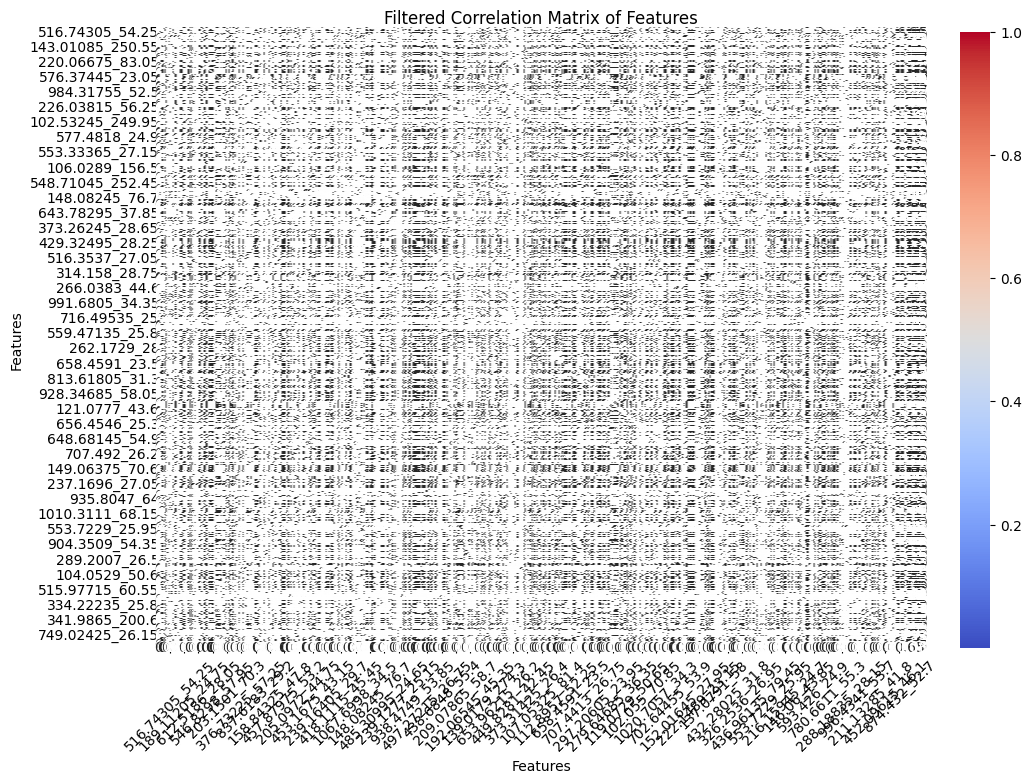

In [22]:
corr_matrix = data.corr().abs()

# Set a threshold for highly correlated features
threshold = 0.5

# Create a mask to identify highly correlated features
mask = (corr_matrix > threshold) & (corr_matrix < 1.0)

# Find indices of feature pairs to remove
indices_to_remove = pd.DataFrame(index=data.columns, columns=data.columns, data=False)
for feature in data.columns:
    indices = corr_matrix.index[mask[feature]]
    indices_to_remove.loc[feature, indices] = True

# Extract groups of highly correlated features
correlated_groups = []
for feature in data.columns:
    correlated_features = indices_to_remove.columns[indices_to_remove.loc[feature]]
    if len(correlated_features) > 0:
        correlated_features = list(correlated_features) + [feature]
        correlated_groups.append(correlated_features)

# Remove duplicate groups and sort for consistency
correlated_groups = [sorted(list(set(group))) for group in correlated_groups]
correlated_groups = sorted(correlated_groups)
correlated_groups = list(group for group, _ in itertools.groupby(correlated_groups))

# Filter groups based on p-value condition
filtered_correlated_groups = []
for group in correlated_groups:
    valid_features = [feature for feature in group if feature in ranking_df[ranking_df['pvalueless'] == 'Yes']['Feature'].values]
    if len(valid_features) > 1:  # Only consider groups with more than one feature
        filtered_correlated_groups.append(valid_features)


group_scores = []
seen_pairs = set()
for group in filtered_correlated_groups:
    for feature in group:
        other_features = [f for f in group if f != feature]
        for other_feature in other_features:
            if corr_matrix.loc[feature, other_feature] > threshold:  # Apply threshold filter
                pair = tuple(sorted((feature, other_feature)))
                if pair not in seen_pairs:
                    seen_pairs.add(pair)
                    score = corr_matrix.loc[feature, other_feature]
                    print(f"Filtered Correlated Pair: {feature} and {other_feature} - Correlation: {score:.2f}")
                    group_scores.append({
                        'Feature1': pair[0],
                        'Feature2': pair[1],
                        'Correlation': score
                    })


group_scores_df = pd.DataFrame(group_scores)
print(group_scores_df)

filtered_features = set()
for group in filtered_correlated_groups:
    filtered_features.update(group)
filtered_features = list(filtered_features) 
filtered_corr_matrix = corr_matrix.loc[filtered_features, filtered_features]

#  heatmap of the filtered correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Filtered Correlation Matrix of Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [23]:
group_scores_df.to_csv('C:/Users/shrra/Downloads/MASH_ML/May30 files/Metab_group_corr.csv', index=False)